<a href="https://colab.research.google.com/github/ryonpham/Tu-n-5/blob/main/27_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4cb28cd84506d1a81fa4675de5b72852de53c96993bb2011aefbd658088210e2
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


16.54901960784313


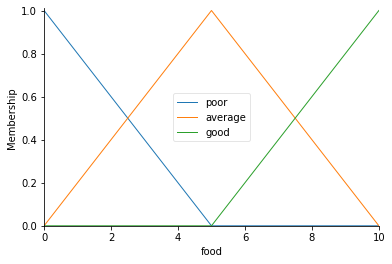

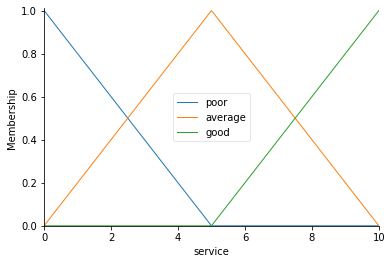

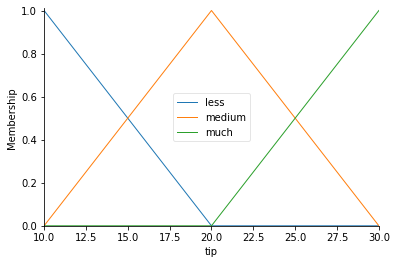

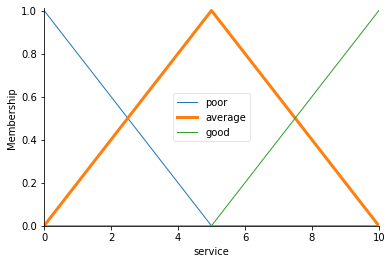

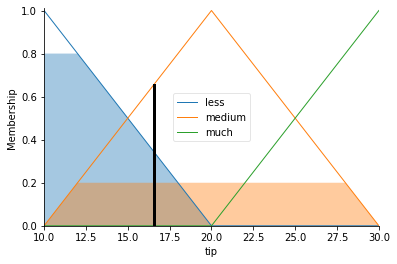

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['medium']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
service['average'].view()
rule1=ctrl.Rule(food['poor']&service['poor'], tip['less'])
rule2=ctrl.Rule(food['poor']&service['average'], tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'], tip['medium'])
rule4=ctrl.Rule(food['average']&service['poor'], tip['less'])
rule5=ctrl.Rule(food['average']&service['average'], tip['medium'])
rule6=ctrl.Rule(food['average']&service['good'], tip['much'])
rule7=ctrl.Rule(food['good']&service['poor'], tip['medium'])
rule8=ctrl.Rule(food['good']&service['average'], tip['much'])
rule9=ctrl.Rule(food['good']&service['good'], tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=1
tipping.input['service']=1
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

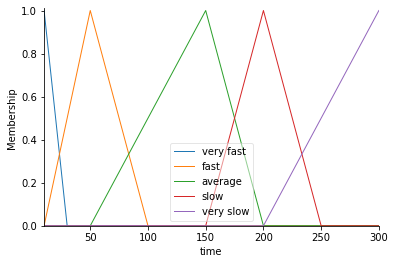

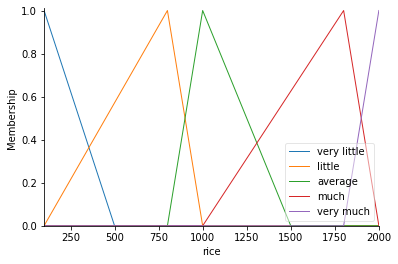

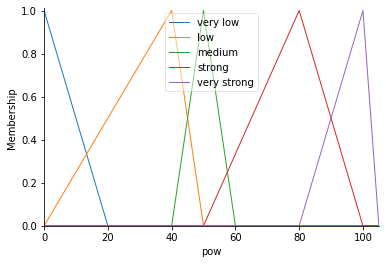

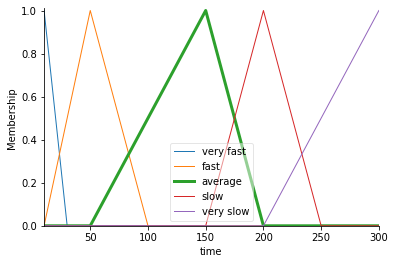

In [24]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt


time=ctrl.Antecedent(np.arange(10,301,5),'time')
rice=ctrl.Antecedent(np.arange(100,2010,10),'rice')
pow=ctrl.Consequent(np.arange(0,110,5),'pow')

time['very fast']=fuzz.trimf(time.universe,[10,10,30])
time['fast']=fuzz.trimf(time.universe,[10,50,100])
time['average']=fuzz.trimf(time.universe,[50,150,200])
time['slow']=fuzz.trimf(time.universe,[150,200,250])
time['very slow']=fuzz.trimf(time.universe,[200,300,300])

rice['very little']=fuzz.trimf(rice.universe,[100,100,500])
rice['little']=fuzz.trimf(rice.universe,[100,800,1000])
rice['average']=fuzz.trimf(rice.universe,[800,1000,1500])
rice['much']=fuzz.trimf(rice.universe,[1000,1800,2000])
rice['very much']=fuzz.trimf(rice.universe,[1800,2000,2000])

pow['very low']=fuzz.trimf(pow.universe,[0,0,20])
pow['low']=fuzz.trimf(pow.universe,[0,40,50])
pow['medium']=fuzz.trimf(pow.universe,[40,50,60])
pow['strong']=fuzz.trimf(pow.universe,[50,80,100])
pow['very strong']=fuzz.trimf(pow.universe,[80,100,100])

time.view()
rice.view()
pow.view()
time['average'].view()


94.99752444987776


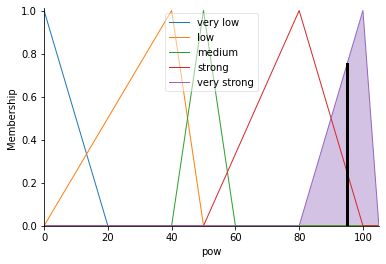

In [34]:
rule1 = ctrl.Rule(rice['very little'] &time['very fast'], pow['medium'])
rule2 = ctrl.Rule(rice['very little'] &time['fast'], pow['medium'])
rule3 = ctrl.Rule(rice['very little'] &time['average'], pow['low'])
rule4 = ctrl.Rule(rice['very little'] &time['slow'], pow['low'])
rule5 = ctrl.Rule(rice['very little'] &time['very slow'], pow['very low'])
rule6 = ctrl.Rule(rice['little'] &time['very fast'], pow['strong'])
rule7 = ctrl.Rule(rice['little'] &time['fast'], pow['medium'])
rule8 = ctrl.Rule(rice['little'] &time['average'], pow['medium'])
rule9 = ctrl.Rule(rice['little'] &time['slow'], pow['low'])
rule10 = ctrl.Rule(rice['little'] &time['very slow'], pow['very low'])
rule11 = ctrl.Rule(rice['average'] &time['very fast'], pow['strong'])
rule12 = ctrl.Rule(rice['average'] &time['fast'], pow['strong'])
rule13 = ctrl.Rule(rice['average'] &time['average'], pow['strong'])
rule14 = ctrl.Rule(rice['average'] &time['slow'], pow['medium'])
rule15 = ctrl.Rule(rice['average'] &time['very slow'], pow['low'])
rule16 = ctrl.Rule(rice['much'] &time['very fast'], pow['very strong'])
rule17 = ctrl.Rule(rice['much'] &time['fast'], pow['very strong'])
rule18 = ctrl.Rule(rice['much'] &time['average'], pow['strong'])
rule19 = ctrl.Rule(rice['much'] &time['slow'], pow['strong'])
rule20 = ctrl.Rule(rice['much'] &time['very slow'], pow['medium'])
rule21 = ctrl.Rule(rice['very much'] &time['very fast'], pow['very strong'])
rule22 = ctrl.Rule(rice['very much'] &time['fast'], pow['very strong'])
rule23 = ctrl.Rule(rice['very much'] &time['average'], pow['very strong'])
rule24 = ctrl.Rule(rice['very much'] &time['slow'], pow['strong'])
rule25 = ctrl.Rule(rice['very much'] &time['very slow'], pow['strong'])

power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,
                                   rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,
                                   rule23,rule24,rule25])
power = ctrl.ControlSystemSimulation(power_ctrl)
power.input['rice'] = 1782
power.input['time'] = 50
power.compute() #tính toán
print(power.output['pow'])
pow.view(sim = power)
